<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Boosting" data-toc-modified-id="Introduction-to-Boosting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Boosting</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Functions" data-toc-modified-id="Useful-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Functions</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Train-test-split-with-stratify" data-toc-modified-id="Train-test-split-with-stratify-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train test split with stratify</a></span></li><li><span><a href="#Train-Validation-with-stratify" data-toc-modified-id="Train-Validation-with-stratify-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train Validation with stratify</a></span></li><li><span><a href="#Modelling-xgboost-imbalanced-data" data-toc-modified-id="Modelling-xgboost-imbalanced-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modelling xgboost imbalanced data</a></span><ul class="toc-item"><li><span><a href="#Default-Method" data-toc-modified-id="Default-Method-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Default Method</a></span></li><li><span><a href="#Using-custom-eval-function-(Not-custom-objective-function-with-feval)" data-toc-modified-id="Using-custom-eval-function-(Not-custom-objective-function-with-feval)-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Using custom eval function (Not custom objective function with feval)</a></span></li></ul></li><li><span><a href="#Tune-hyperparameters-using-Optuna-with-custom-loss" data-toc-modified-id="Tune-hyperparameters-using-Optuna-with-custom-loss-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Tune hyperparameters using Optuna with custom loss</a></span></li><li><span><a href="#Calibrate-the-probabilities-(Stacking-models)" data-toc-modified-id="Calibrate-the-probabilities-(Stacking-models)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Calibrate the probabilities (Stacking models)</a></span></li><li><span><a href="#Time-Taken" data-toc-modified-id="Time-Taken-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Time Taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Introduction to Boosting
References: 
- https://github.com/dmlc/xgboost/tree/master/demo/guide-python
- https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- http://xgboost.readthedocs.org/en/latest/parameter.html#general-parameters
- https://github.com/dmlc/xgboost/tree/master/demo/guide-python
- https://xgboost.readthedocs.io/en/latest/python/python_api.html

The term `Boosting` refers to a family of algorithms which converts weak learner to strong learners.

There are many boosting algorithms which impart additional boost to model’s accuracy. In this tutorial, we’ll learn about the two most commonly used algorithms i.e. Gradient Boosting (GBM) and XGboost.

Generally XGboost is considered more advanced than gbm. 
- xgboost supports regularization, however gbm does not.
- xgboost is blazingley faster than gbm.
- xgboost has built-in routine to handle missing values.
- xgboost has tree pruning mechanisms,however gbm and random forest are greedy algorithms and do not have tree pruning.
- In xgboost we can run cross-validation at each iteration of the boosting. But in gbm, we have to run grid search.

# Imports

In [1]:
import time

time_start_notebook = time.time()

In [2]:
import numpy as np
import pandas as pd

SEED = 0
RNG = np.random.RandomState(SEED)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams.update({'font.size': 16})
plt.style.use('ggplot')
%matplotlib inline

# mixed
import copy
import pprint
pp = pprint.PrettyPrinter(indent=4)

# scale and split
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.isotonic import IsotonicRegression

# sklearn scalar metrics
import sklearn.metrics as skmetrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# roc auc and curves
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# xgboost
import xgboost
import xgboost as xgb
from xgboost import XGBClassifier

# six and pickle
import six
import pickle
import joblib

# hyperopt
import hyperopt
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, STATUS_FAIL
from hyperopt.pyll import scope
from hyperopt.pyll.stochastic import sample

# optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) # use INFO to see progress

# model evaluation
import shap
import lime
import eli5
from eli5.sklearn import PermutationImportance
import yellowbrick
import scikitplot

# versions
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


Bhishan Poudel 2021-08-10 

CPython 3.7.7
IPython 7.22.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

shap        0.39.0
json        2.0.9
hyperopt    0.2.3
pandas      1.3.0
eli5        0.10.1
autopep8    1.5.2
joblib      1.0.1
numpy       1.19.5
sklearn     0.23.1
six         1.16.0
yellowbrick 1.1
scikitplot  0.3.7
xgboost     1.3.3
optuna      2.7.0



The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.


In [3]:
# my local library
import sys
sys.path.append("/Users/poudel/Dropbox/a00_Bhishan_Modules/bhishan/")
from bhishan import bp

In [4]:
%load_ext autoreload
%autoreload 2

# Useful Functions

In [5]:
def get_profit(y_true, y_pred):
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_true,y_pred).ravel()
    profit = 400*tp - 200*fn - 100*fp
    return profit

scoring = sklearn.metrics.make_scorer(get_profit, greater_is_better=True)

# Load the data

In [6]:
ifile = '../data/raw/creditcard.csv.zip'
df = pd.read_csv(ifile,compression='zip')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
target = 'Class'
df[target].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

# Train test split with stratify

In [8]:
from sklearn.model_selection import train_test_split

target = 'Class'
df_Xtrain_orig, df_Xtest, ser_ytrain_orig, ser_ytest = train_test_split(
    df.drop(target,axis=1), 
    df[target],
    test_size=0.2, 
    random_state=SEED, 
    stratify=df[target])

ytrain_orig = ser_ytrain_orig.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

# Train Validation with stratify

In [9]:
df_Xtrain, df_Xvalid, ser_ytrain, ser_yvalid = train_test_split(
    df_Xtrain_orig, 
    ser_ytrain_orig,
    test_size=0.2, 
    random_state=SEED, 
    stratify=ser_ytrain_orig)

ytrain = ser_ytrain.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()
Xvalid = df_Xvalid.to_numpy()
yvalid = ser_yvalid.to_numpy().ravel()

print(df_Xtrain.shape)
df_Xtrain.head()

(182276, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
138257,82565.0,1.118591,0.562709,0.569628,2.987496,-0.365594,-0.531789,-0.044144,0.011932,-0.129131,...,-0.204184,-0.128269,-0.218875,-0.048816,0.617265,0.551384,0.060220,0.016136,0.047100,7.6
60033,49125.0,1.170686,0.083759,0.466278,0.913911,-0.093123,0.427588,-0.372727,0.312777,0.129610,...,-0.226078,-0.176121,-0.584726,0.066051,-0.746667,0.232641,-0.547740,0.038060,0.010995,3.9
31064,36195.0,1.072902,-0.015166,0.942251,1.330631,-0.580474,0.206235,-0.402121,0.313133,0.410088,...,-0.251464,-0.261720,-0.665725,0.167535,0.163815,0.192247,-0.620974,0.050609,0.019181,9.9
245706,152869.0,2.136909,0.088646,-2.490914,0.098321,0.789008,-1.399582,0.854902,-0.492912,-0.254999,...,-0.266383,0.278034,0.934892,-0.211839,-0.234266,0.609699,1.020898,-0.154427,-0.112532,2.0
25871,33805.0,-2.448378,-1.335508,1.240431,1.800068,0.383084,-0.501160,1.080410,-0.604093,-0.319458,...,-0.720572,-0.121319,0.625541,-0.639100,0.522532,-0.073801,-0.162788,0.294912,-0.211222,411.1


# Modelling xgboost imbalanced data
```python
Parameters:
-------------
max_depth=3
learning_rate=0.1
n_estimators=100
verbosity=1 **NOTE: it print in ipython terminal not in browser
silent=None **deprecated use verbosity
objective='binary:logistic' **for binary classification
booster='gbtree' **use default tree not linear
n_jobs=1 **make this -1
nthread=None **deprecated use n_jobs
gamma=0
min_child_weight=1
max_delta_step=0
subsample=1
colsample_bytree=1
colsample_bylevel=1
colsample_bynode=1
reg_alpha=0
reg_lambda=1
scale_pos_weight=1
base_score=0.5
random_state=0 **use your own random state
seed=None      **deprecated use random_state
missing=None
```


[early stopping xgboost official note](https://xgboost.readthedocs.io/en/latest/python/python_intro.html):  


If early stopping occurs, the model will have three additional fields: bst.best_score, bst.best_iteration and bst.best_ntree_limit.
 Note that xgboost.train() will return a model from the last iteration, not the best one.
[Example](https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py)
```python
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
        eval_set=[(X_test, y_test)])

```

## Default Method

In [10]:
ser_ytrain[:5]

138257    0
60033     0
31064     0
245706    0
25871     0
Name: Class, dtype: int64

In [11]:
%%time
from xgboost import XGBClassifier

model = XGBClassifier(random_state=SEED,
                      objective = "binary:logistic",
                      eval_metric='logloss',
                      use_label_encoder=False,
                      n_estimators=10 # make it large
                     )
model.fit(df_Xtrain,ser_ytrain.values)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
CPU times: user 16.7 s, sys: 266 ms, total: 16.9 s
Wall time: 8.95 s


In [12]:
bp.show_methods(model,5)

,0,1,2,3,4
0,apply,fit,kwargs,n_features_in_,save_model
1,base_score,gamma,learning_rate,n_jobs,scale_pos_weight
2,booster,get_booster,load_model,num_parallel_tree,score
3,classes_,get_num_boosting_rounds,max_delta_step,objective,set_params
4,coef_,get_params,max_depth,predict,subsample
5,colsample_bylevel,get_xgb_params,min_child_weight,predict_proba,tree_method
6,colsample_bynode,gpu_id,missing,random_state,use_label_encoder
7,colsample_bytree,importance_type,monotone_constraints,reg_alpha,validate_parameters
8,evals_result,interaction_constraints,n_classes_,reg_lambda,verbosity
9,feature_importances_,intercept_,n_estimators,,


In [13]:
# model.score? # mean accuracy

In [14]:
acc = model.score(df_Xtest,ser_ytest.values)
acc

0.999420666409185

In [15]:
ypreds = model.predict(df_Xtest)

acc = sklearn.metrics.accuracy_score(ser_ytest.values,ypreds)
print('accuracy: ', acc)
ypreds[:5], sum(ypreds)

accuracy:  0.999420666409185


(array([0, 0, 0, 0, 0]), 77)

In [16]:
yprobs1d = model.predict_proba(df_Xtest)[:,1] # take second column

auc = roc_auc_score(ser_ytest.to_numpy().ravel(),yprobs1d)
print('AUC = ', auc)

AUC =  0.9155406060144936


In [17]:
profit = get_profit(ser_ytest.to_numpy().ravel(), ypreds)
print(f"profit = ${profit:,}")

profit = $22,400


## Using custom eval function (Not custom objective function with feval)
- https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html
- https://github.com/dmlc/xgboost/issues/1125

In [18]:
# https://github.com/dmlc/xgboost/issues/1125
def eval_profit(logodds, dtrain):
    """Custom evaluation metric for xgboost.

    Usage:
    -------
    PARAMS_FIT = dict(
        early_stopping_rounds=5, #y_pred = model.predict(X, ntree_limit=model.best_ntree_limit)
        verbose=10,
        eval_set= [(df_Xtrain,ser_ytrain),(df_Xvalid,ser_yvalid)], # for two tuples, we get validation_0 and 1.
        eval_metric=eval_profit,
    )
    
    model = XGBClassifier()
    model.fit(X,y,**PARAMS_FIT)
    evals_result = model.evals_result()
    df_eval1 = pd.DataFrame(evals_result['validation_1'])
    """
    y_prob = 1.0 / (1.0 + np.exp(-logodds))
    labels = dtrain.get_label()

    # profit
    y_pred = (np.array(y_prob)>0.5).astype(np.int8)
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(labels,y_pred).ravel()
    profit = 400*tp - 200*fn - 100*fp
    return 'profit',profit

In [19]:
# https://github.com/dmlc/xgboost/issues/1125
def eval_auc_aucpr_profit(logodds, dtrain):
    """Custom evaluation metric for xgboost.

    Usage:
    -------
    PARAMS_FIT = dict(
        early_stopping_rounds=5, #y_pred = model.predict(X, ntree_limit=model.best_ntree_limit)
        verbose=10,
        eval_set= [(df_Xtrain,ser_ytrain),(df_Xvalid,ser_yvalid)], # for two tuples, we get validation_0 and 1.
        eval_metric=eval_auc_aucpr_profit,
    )
    
    model = XGBClassifier()
    model.fit(X,y,**PARAMS_FIT)
    evals_result = model.evals_result()
    df_eval1 = pd.DataFrame(evals_result['validation_1'])
    """

    y_prob = 1.0 / (1.0 + np.exp(-logodds))
    labels = dtrain.get_label()

    # auc
    auc = sklearn.metrics.roc_auc_score(labels, y_prob)
    
    # aucpr
    pre,rec,thr = sklearn.metrics.precision_recall_curve(labels,y_prob)
    aucpr = sklearn.metrics.auc(rec,pre)

    # profit
    y_pred = (np.array(y_prob)>0.5).astype(np.int8)
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(labels,y_pred).ravel()
    profit = 400*tp - 200*fn - 100*fp
    return [('auc', auc), ('aucpr', aucpr),('profit',profit)]

In [20]:
%%time
from xgboost import XGBClassifier

model = XGBClassifier(random_state=SEED,
                      objective = "binary:logistic",
                      eval_metric='logloss',
                      use_label_encoder=False,
                      n_estimators=20, # make it large
                     )

PARAMS_FIT = dict(
    early_stopping_rounds=5, #y_pred = model.predict(X, ntree_limit=model.best_ntree_limit)
    verbose=10,
    eval_set= [(df_Xtrain,ser_ytrain),(df_Xvalid,ser_yvalid)], # for two tuples, we get validation_0 and 1.
    eval_metric=eval_auc_aucpr_profit, # NOTE: xvalid uses eval_metric for early stop.
    )


model.fit(df_Xtrain,ser_ytrain.values,**PARAMS_FIT)

[0]	validation_0-logloss:0.43780	validation_0-auc:0.91259	validation_0-aucpr:0.86564	validation_0-profit:86500.00000	validation_1-logloss:0.43788	validation_1-auc:0.94924	validation_1-aucpr:0.87099	validation_1-profit:19900.00000
[4]	validation_0-logloss:0.10771	validation_0-auc:0.91575	validation_0-aucpr:0.87211	validation_0-profit:91800.00000	validation_1-logloss:0.10767	validation_1-auc:0.96824	validation_1-aucpr:0.90433	validation_1-profit:21600.00000
CPU times: user 13.9 s, sys: 213 ms, total: 14.1 s
Wall time: 4.7 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [21]:
evals_result = model.evals_result()
evals_result.keys() # how many datasets are in eval_set?

dict_keys(['validation_0', 'validation_1'])

In [22]:
dfs_evals_result = []
for key in evals_result.keys():
    _ = pd.DataFrame(evals_result[key])
    _.index.name = key
    dfs_evals_result.append(_)

In [23]:
df_eval0 = dfs_evals_result[0]
df_eval0

,logloss,auc,aucpr,profit
validation_0,,,,
0,0.437801,0.912590,0.865638,86500.0
1,0.297067,0.912593,0.868193,86500.0
2,0.208065,0.915748,0.868741,90000.0
3,0.148686,0.915746,0.868922,91800.0
4,0.107707,0.915747,0.872107,91800.0
5,0.078608,0.917326,0.872466,91900.0


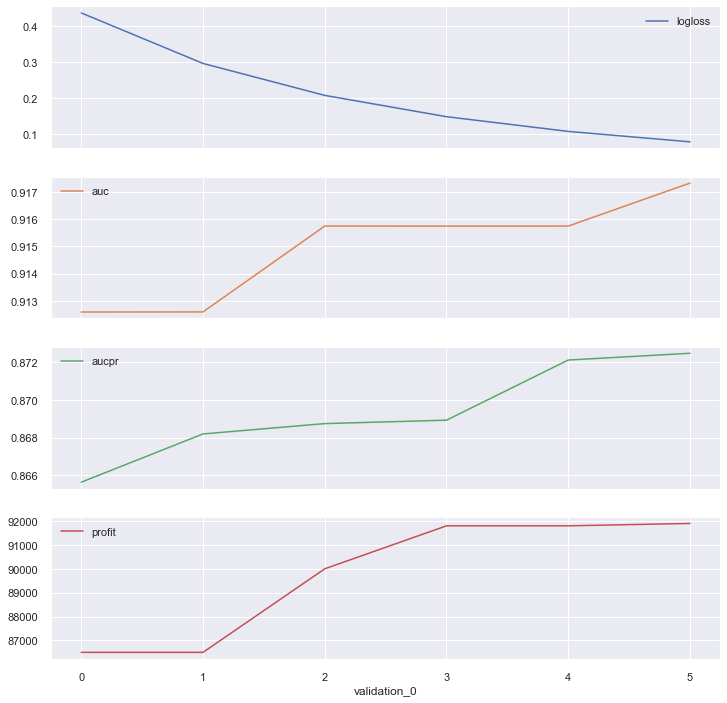

In [24]:
df_eval0.plot(subplots=True,figsize=(12,12));

In [25]:
# predictions

In [26]:
y_pred = model.predict(df_Xtest)
sum(y_pred)

76

In [27]:
y_pred_best_early = model.predict(df_Xtest, ntree_limit=model.best_ntree_limit)
sum(y_pred_best_early)

76

In [28]:
y_prob = model.predict_proba(df_Xtest, ntree_limit=model.best_ntree_limit)
y_prob[:2]

array([[0.6455703 , 0.35442975],
       [0.6455703 , 0.35442975]], dtype=float32)

In [29]:
y_prob1d = y_prob[:,1] # take second column of prob
y_prob1d[:5]

array([0.35442975, 0.35442975, 0.35442975, 0.35442975, 0.35442975],
      dtype=float32)

In [30]:
y_pred = (np.array(y_prob1d) > 0.5).astype(np.int8)
sum(y_pred), y_pred[:5]

(76, array([0, 0, 0, 0, 0], dtype=int8))

# Tune hyperparameters using Optuna with custom loss

In [31]:
def objective(trial):
    params_xgb_optuna = {
        'eval_metric': 'auc',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1.0),
        'max_depth':trial.suggest_int('max_depth', 5, 20),
        'n_estimators': trial.suggest_int('n_estimators', 150, 1000), 
        'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 100.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 100.0),
    }

    model = XGBClassifier(random_state=SEED,**params_xgb_optuna)
    model.fit(df_Xtrain,ser_ytrain)

    vdpreds = model.predict(df_Xvalid)
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(yvalid,vdpreds).ravel()
    profit = 400*tp - 200*fn - 100*fp
    return profit

In [32]:
# NOTE: there is inherent non-determinism in optuna hyperparameter selection
#       we may not get the same hyperparameters when run twice.


sampler = optuna.samplers.TPESampler(seed=SEED)
N_TRIALS = 1 # make it large

study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='xgb_optuna',
                            storage='sqlite:///xgb_optuna_fraud_classifcation2.db',
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS)

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



In [33]:
# best params
params_best = study.best_trial.params
params_best

{'learning_rate': 0.01567667719550607,
 'max_depth': 16,
 'n_estimators': 662,
 'reg_alpha': 0.034828020870283326,
 'reg_lambda': 0.028770084050677908,
 'subsample': 0.863464954899069}

In [34]:
%%time

model_name = 'xgboost'
desc = 'grid search optuna custom loss'
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig.to_numpy().ravel()
Xtx = df_Xtest
ytx = ser_ytest.to_numpy().ravel()

# use best model
params_best =  study.best_trial.params

model = xgb.XGBClassifier(random_state=SEED,eval_metric='logloss')
model.set_params(**params_best)

# fit the model
model.fit(Xtr, ytr,verbose=50)

# prediction
ypreds = model.predict(df_Xtest)

# evaluation
profit = get_profit(ytest,ypreds)
print(f"Profit = {profit:,}.")

Profit = 23,700.
CPU times: user 31min 14s, sys: 3.05 s, total: 31min 17s
Wall time: 8min 11s


# Calibrate the probabilities (Stacking models)

- [Towardsdatascience: Python’s «predict_proba» Doesn’t Actually Predict Probabilities (and How to Fix It)](https://towardsdatascience.com/pythons-predict-proba-doesn-t-actually-predict-probabilities-and-how-to-fix-it-f582c21d63fc)

In [35]:
from sklearn.isotonic import IsotonicRegression

In [36]:
# y_prob given from xgboost may not be well calibrated for imbalanced data
# let's get another set of probabilities.

vd_prob = model.predict_proba(df_Xvalid)
vd_prob[:5]

array([[9.9998218e-01, 1.7828401e-05],
       [9.9994946e-01, 5.0526865e-05],
       [9.9997103e-01, 2.8985065e-05],
       [9.9996608e-01, 3.3921599e-05],
       [9.9997801e-01, 2.1999766e-05]], dtype=float32)

In [37]:
# fit the model on validaton data
model_isoreg = IsotonicRegression(y_min=0,y_max=1,out_of_bounds='clip')
model_isoreg.fit(vd_prob[:,1], ser_yvalid.values)

IsotonicRegression(out_of_bounds='clip', y_max=1, y_min=0)

In [38]:
# raw probabilities
vd_prob = model.predict_proba(df_Xvalid)
vd_pred = (vd_prob[:,1] >0.5).astype(np.int8)

# calibrated probabilities
vd_prob_iso = model_isoreg.predict(vd_prob[:,1])

# predictions from probabilities
vd_pred_iso = (np.array(vd_prob_iso) > 0.5).astype(np.int8)

profit = get_profit(ser_yvalid.to_numpy().ravel(), vd_pred)

# interestingly, isotonic regression gave me worse result.
profit_iso = get_profit(ser_yvalid.to_numpy().ravel(), vd_pred_iso)

print(f"validation profit without calibration                 : ${profit:,}")
print(f"validation profit with isotonic regression calibration: ${profit_iso:,}")

validation profit without calibration                 : $31,600
validation profit with isotonic regression calibration: $31,600


In [39]:
# raw probabilities
y_prob = model.predict_proba(df_Xtest)
y_pred = (y_prob[:,1] >0.5).astype(np.int8)

# calibrated probabilities
y_prob_iso = model_isoreg.predict(y_prob[:,1])

# predictions from probabilities
y_pred_iso = (np.array(y_prob_iso) > 0.5).astype(np.int8)

profit = get_profit(ser_ytest.to_numpy().ravel(), y_pred)

# interestingly, isotonic regression gave me worse result.
profit_iso = get_profit(ser_ytest.to_numpy().ravel(), y_pred_iso)


print(f"profit without calibration                 : ${profit:,}")
print(f"profit with isotonic regression calibration: ${profit_iso:,}")

profit without calibration                 : $23,700
profit with isotonic regression calibration: $24,200


# Time Taken

In [40]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 15 min 27 secs
